<a href="https://colab.research.google.com/github/kyro19/Diabetes_Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings

In [ ]:
data = pd.read_csv('diabetes.csv')


In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.iloc[0]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64

In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
data['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

<Axes: xlabel='Outcome', ylabel='count'>

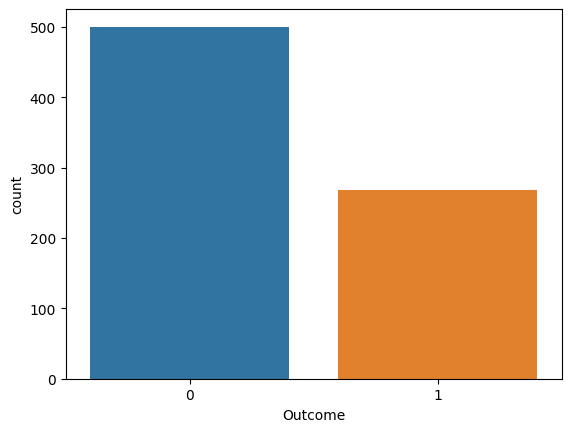

In [ ]:
sns.countplot(x='Outcome',data=data)

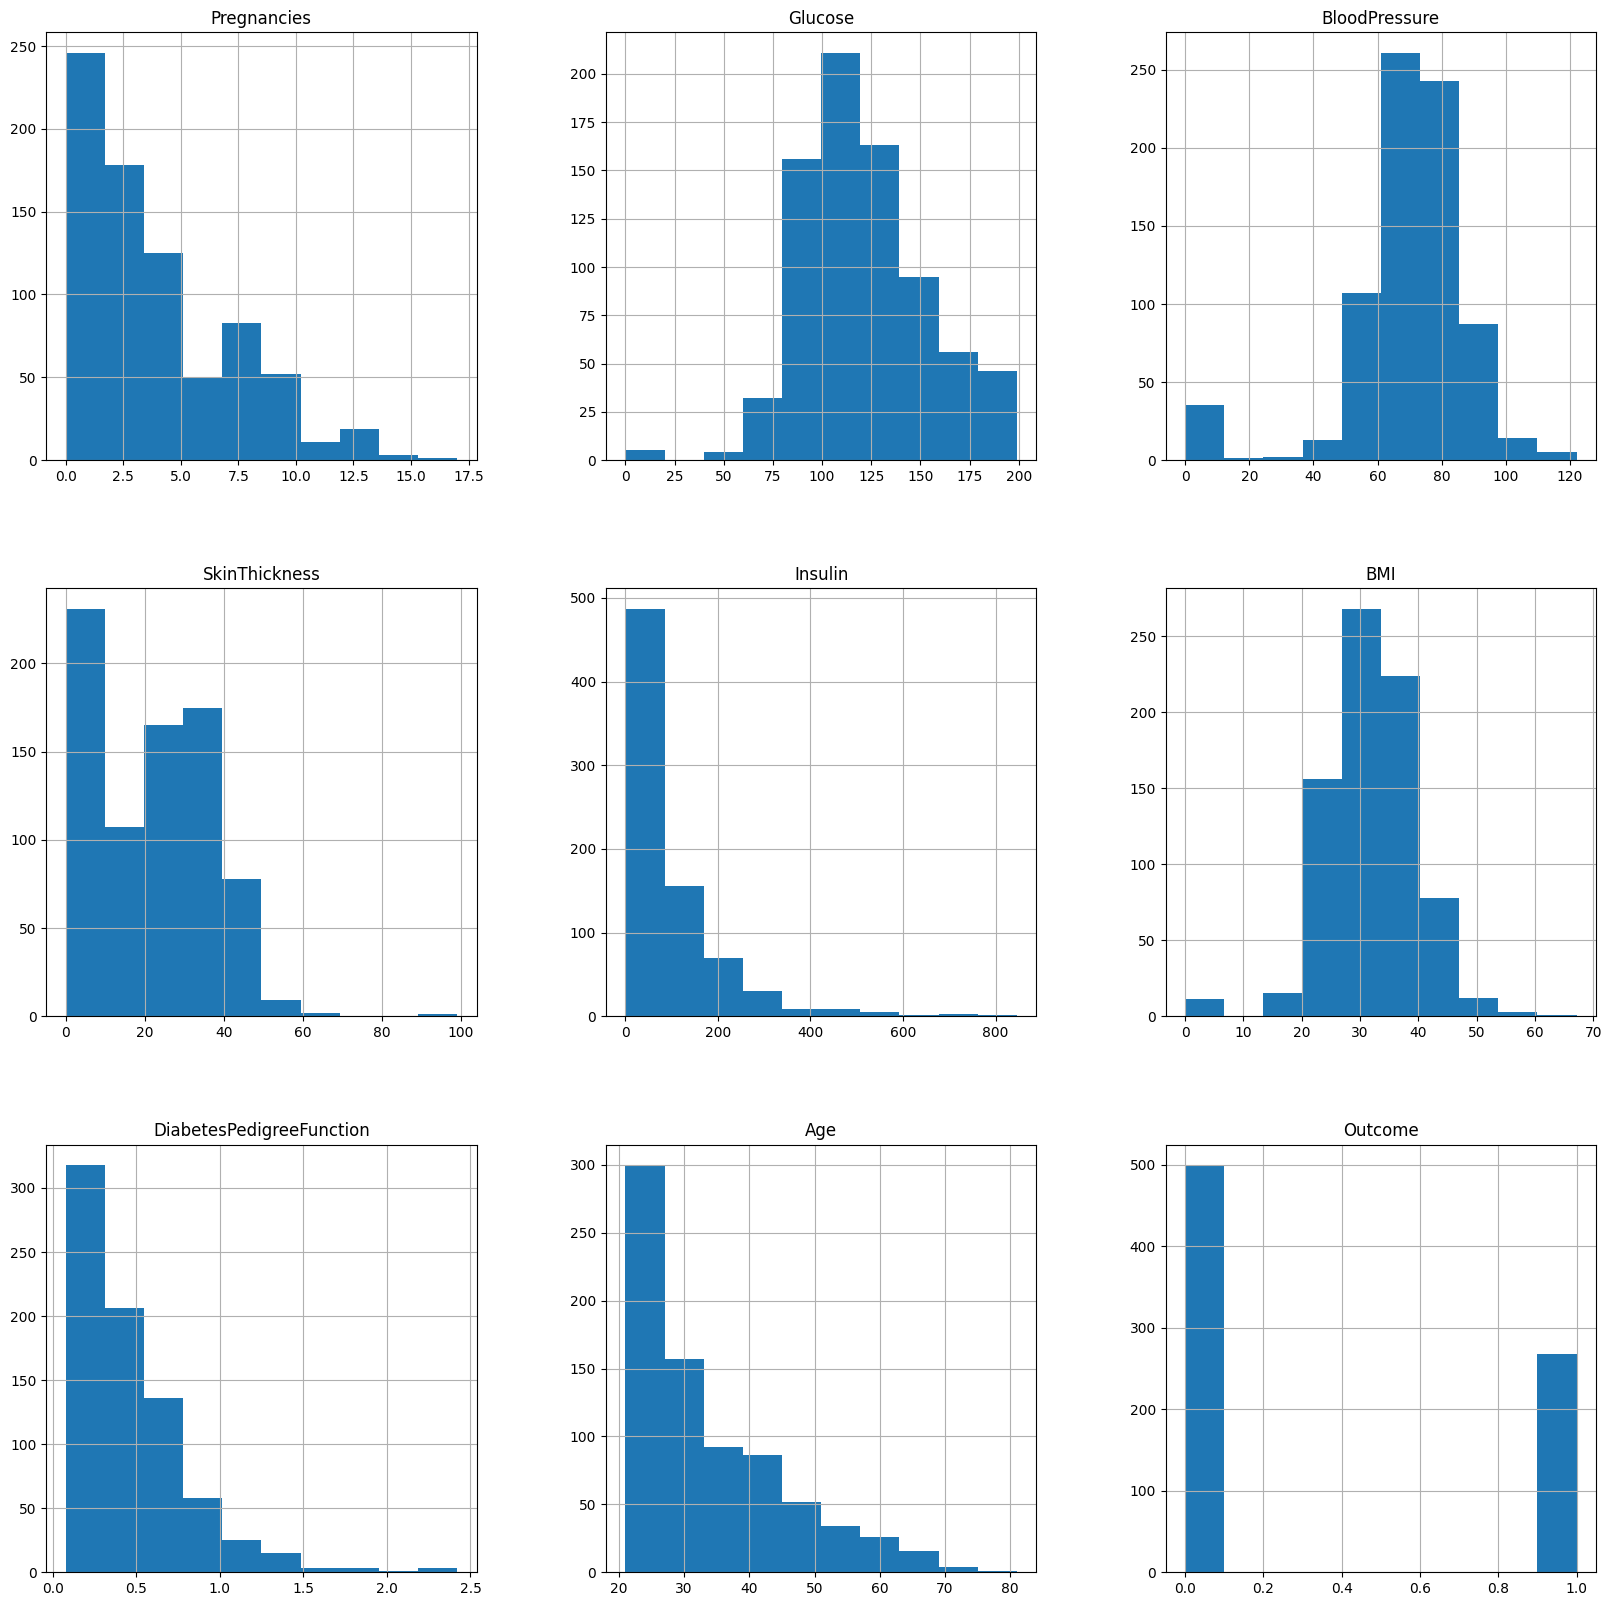

In [ ]:
p = data.hist(figsize = (20,20))

In [ ]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

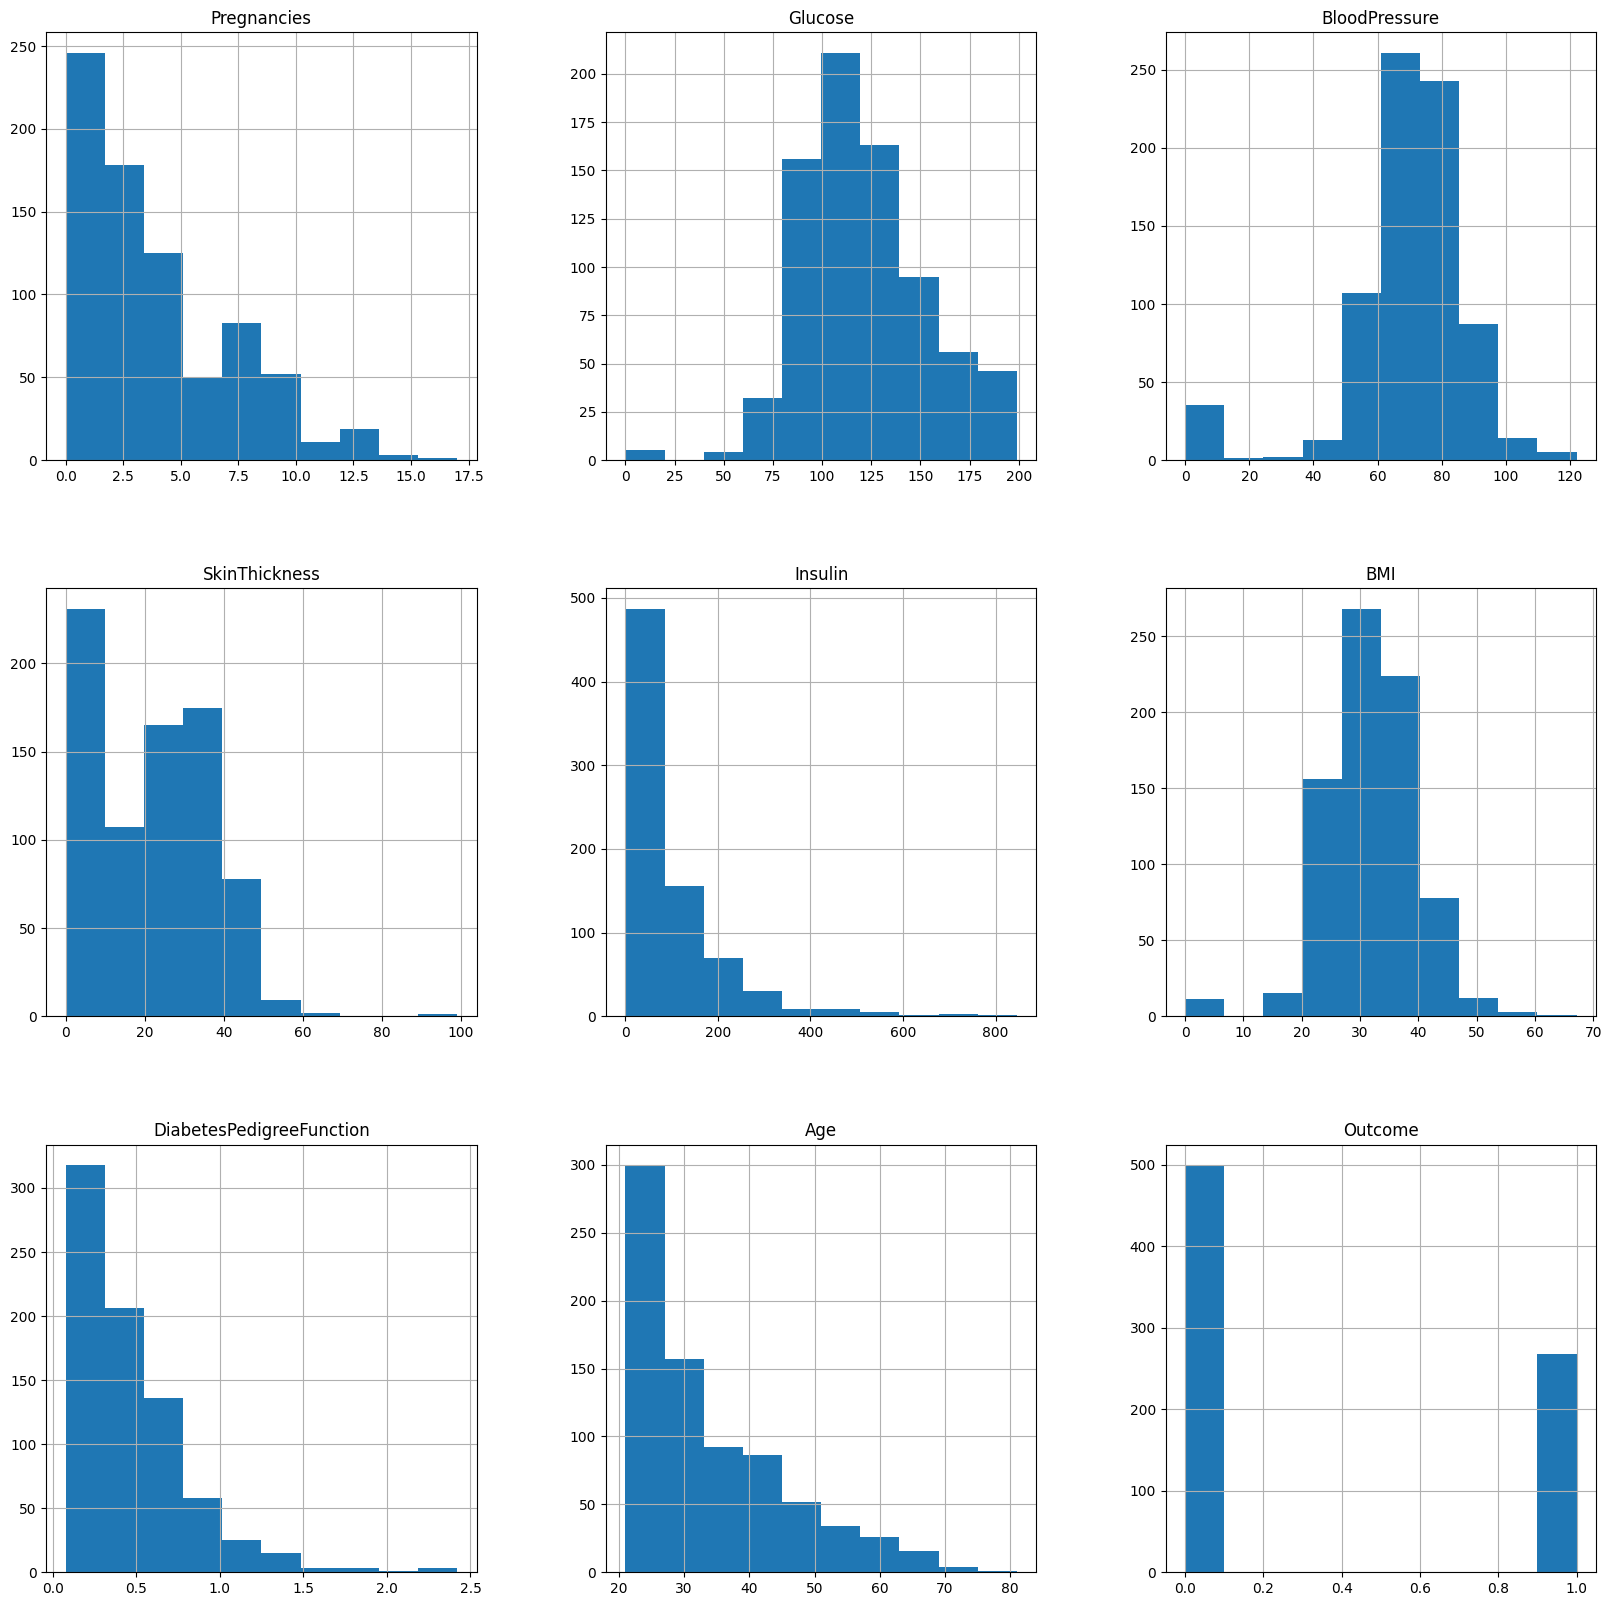

In [ ]:
p = data.hist(figsize = (20,20))

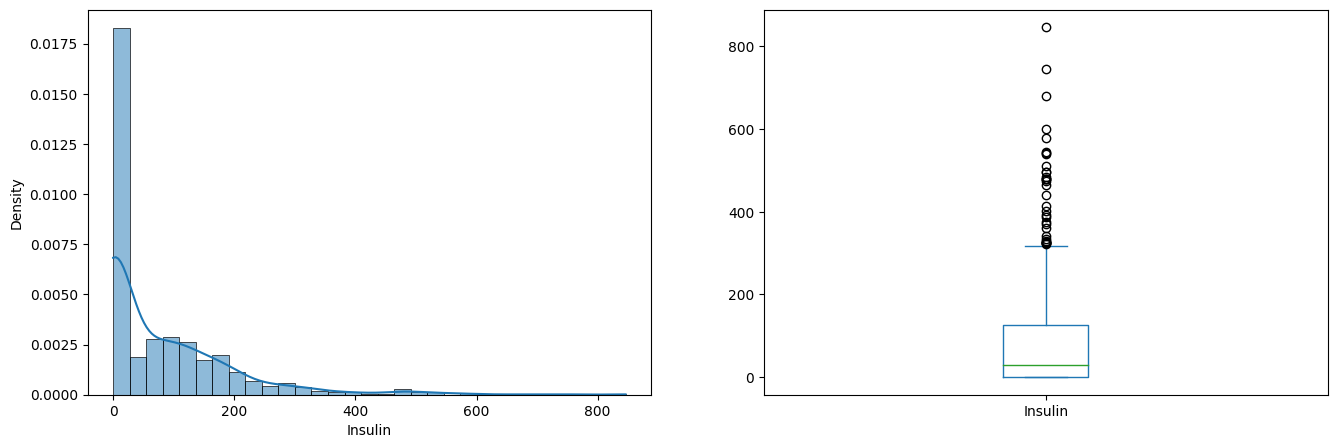

In [ ]:
plt.subplot(121), sns.histplot(data['Insulin'],kde = True, stat="density")
plt.subplot(122), data['Insulin'].plot.box(figsize=(16,5))
plt.show()

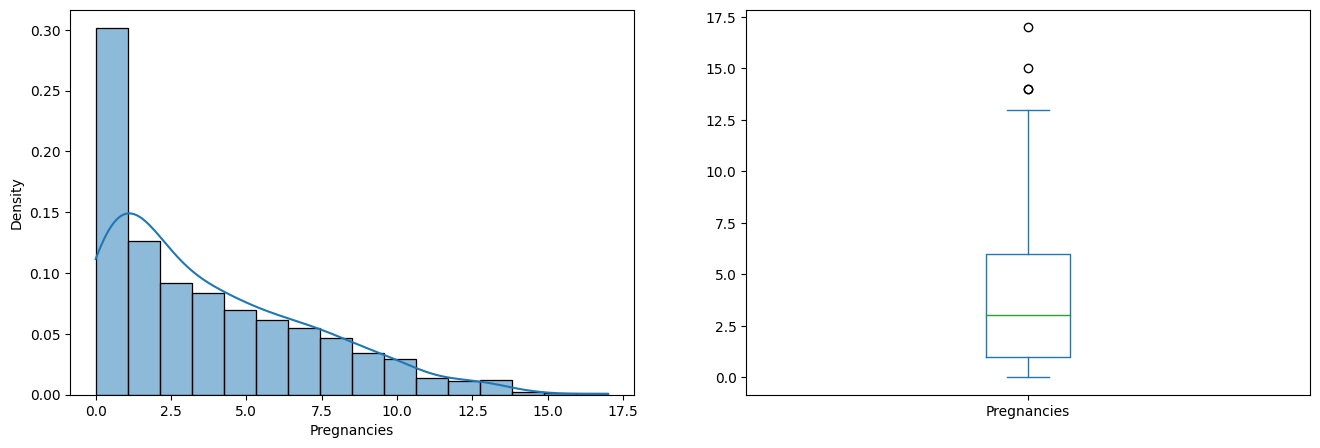

In [ ]:
plt.subplot(121), sns.histplot(data['Pregnancies'],kde = True, stat="density")
plt.subplot(122), data['Pregnancies'].plot.box(figsize=(16,5))
plt.show()

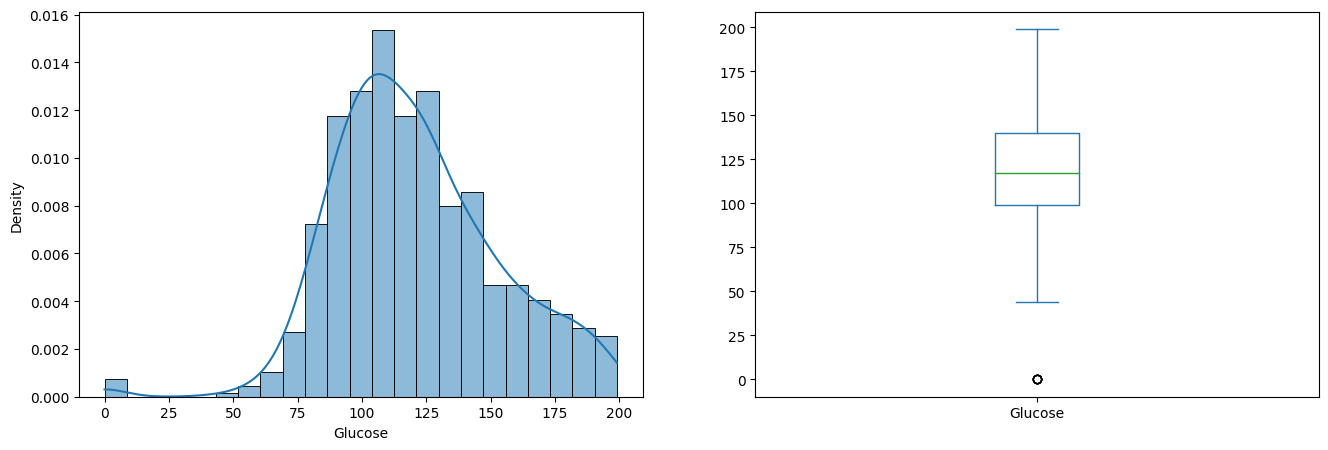

In [ ]:
plt.subplot(121), sns.histplot(data['Glucose'],kde = True, stat="density")
plt.subplot(122), data['Glucose'].plot.box(figsize=(16,5))
plt.show()

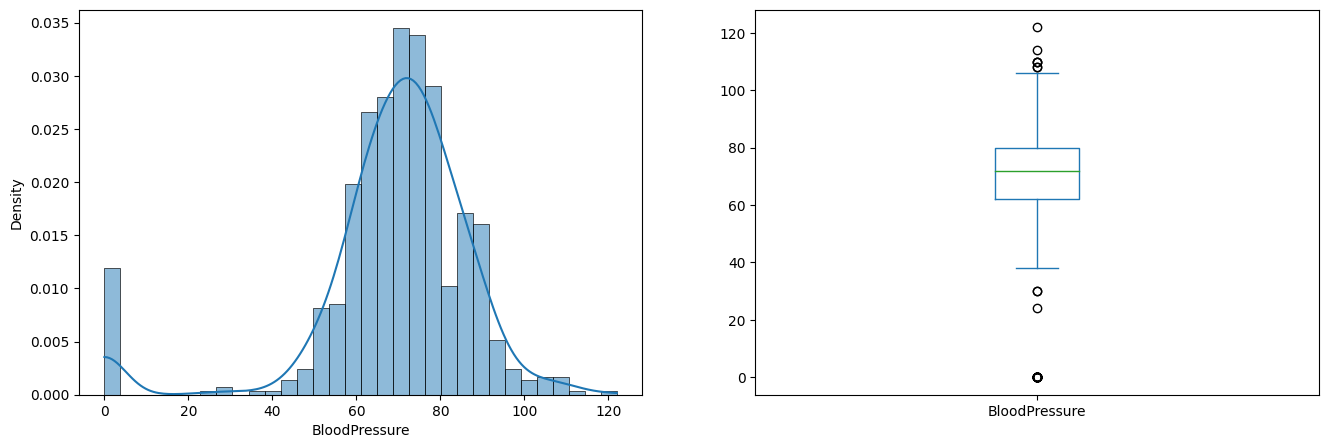

In [ ]:
plt.subplot(121), sns.histplot(data['BloodPressure'],kde = True, stat="density")
plt.subplot(122), data['BloodPressure'].plot.box(figsize=(16,5))
plt.show()

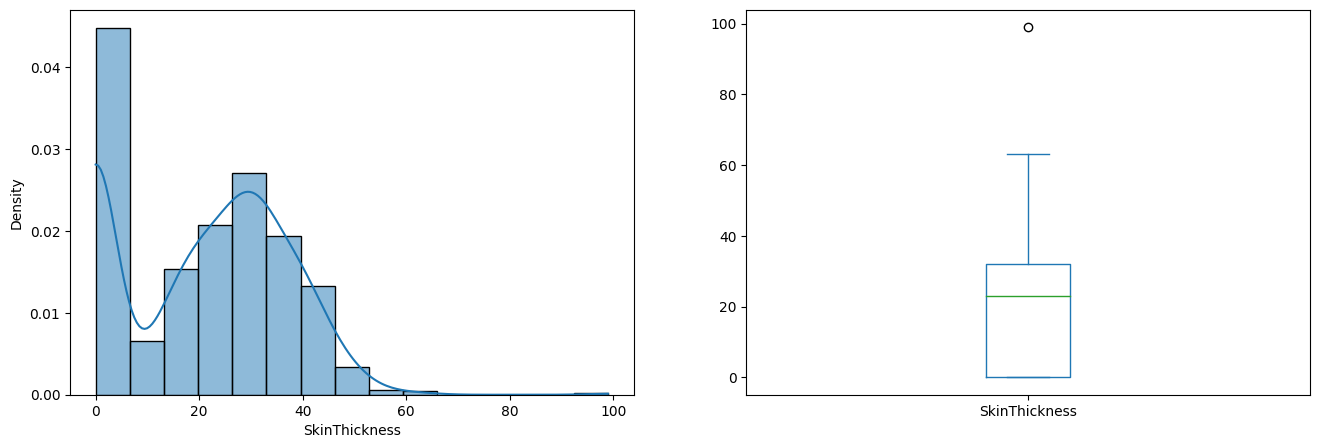

In [ ]:
plt.subplot(121), sns.histplot(data['SkinThickness'],kde = True, stat="density")
plt.subplot(122), data['SkinThickness'].plot.box(figsize=(16,5))
plt.show()

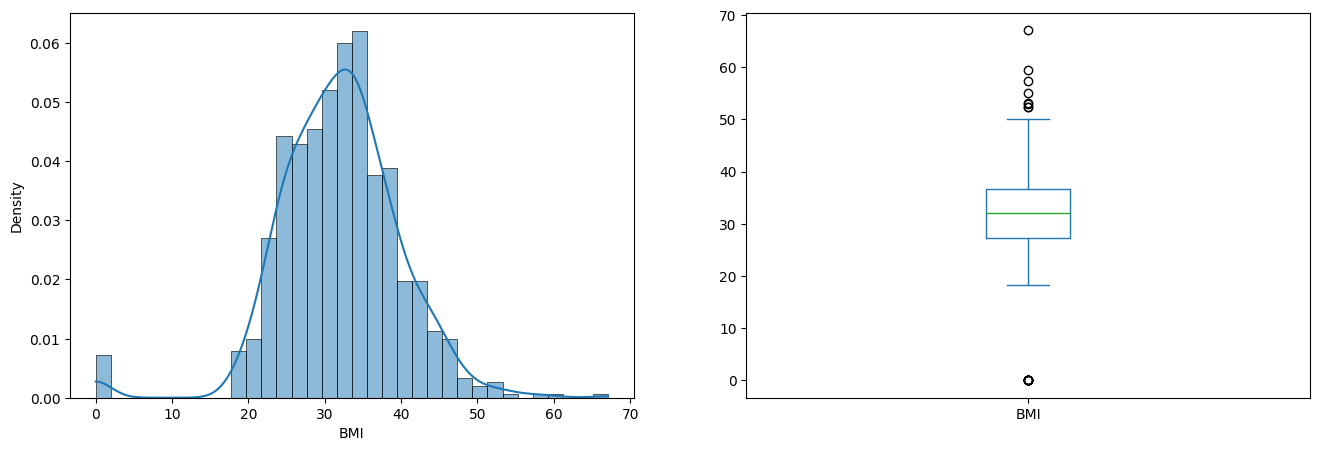

In [ ]:
plt.subplot(121), sns.histplot(data['BMI'],kde = True, stat="density")
plt.subplot(122), data['BMI'].plot.box(figsize=(16,5))
plt.show()

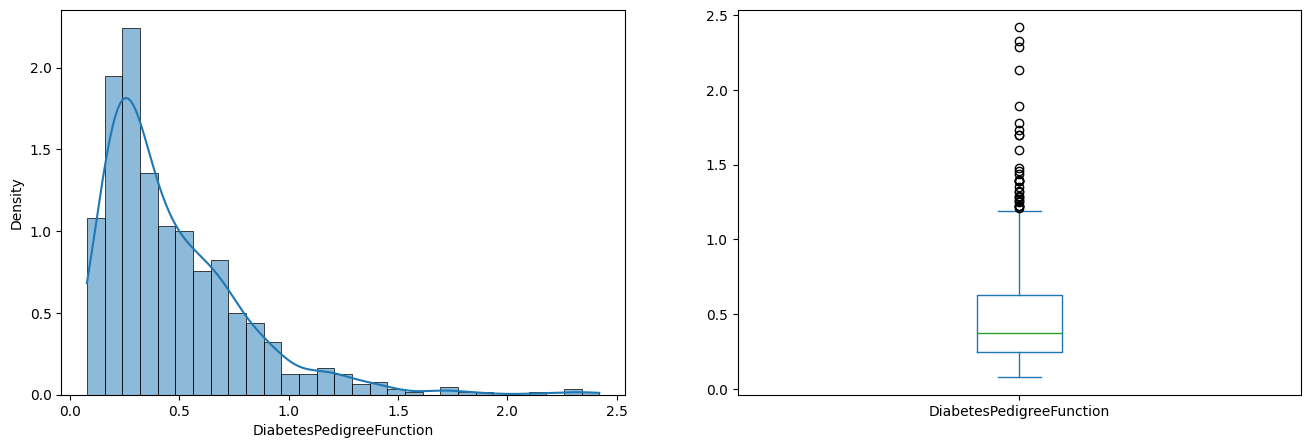

In [ ]:
plt.subplot(121), sns.histplot(data['DiabetesPedigreeFunction'],kde = True, stat="density")
plt.subplot(122), data['DiabetesPedigreeFunction'].plot.box(figsize=(16,5))
plt.show()

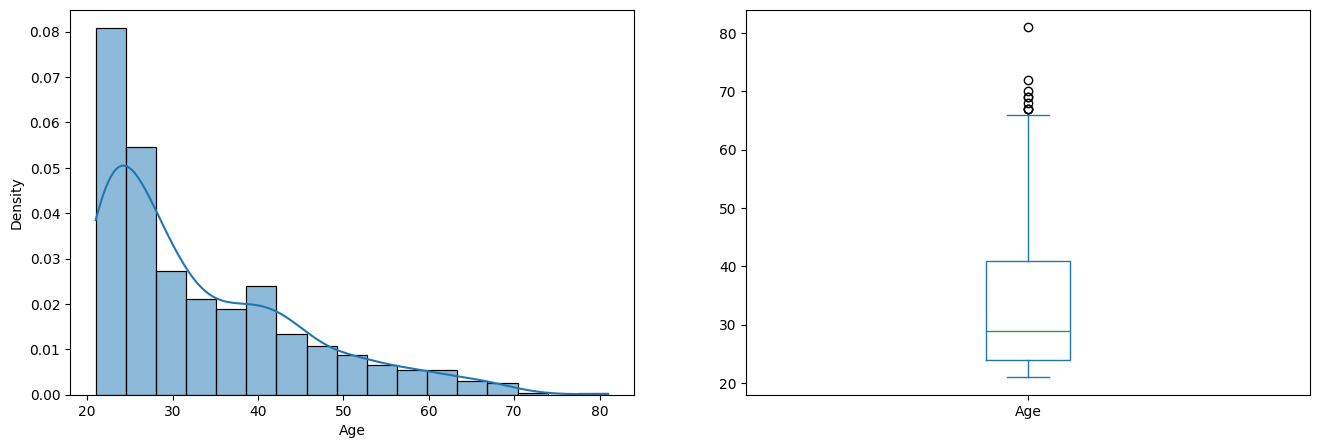

In [ ]:
plt.subplot(121), sns.histplot(data['Age'],kde = True, stat="density")
plt.subplot(122), data['Age'].plot.box(figsize=(16,5))
plt.show()

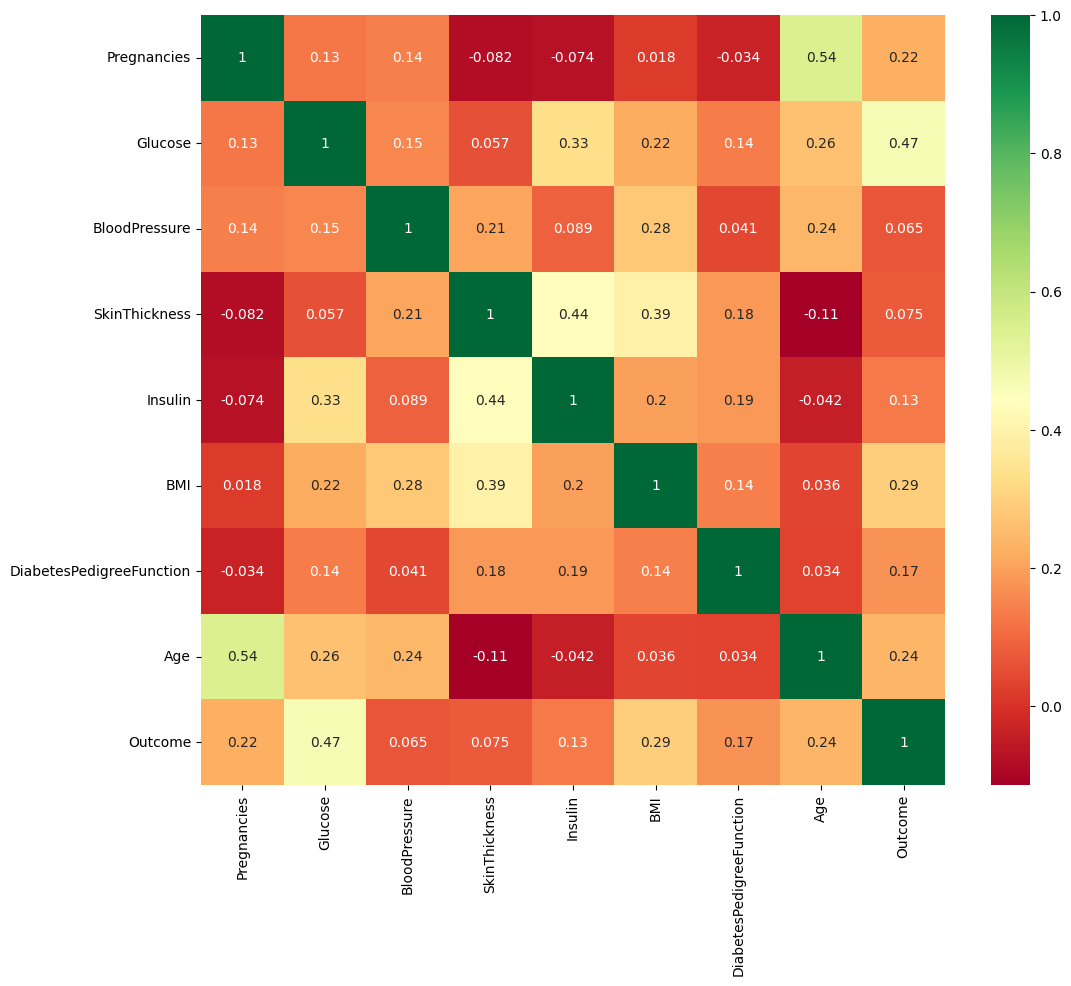

In [ ]:
#Correlation between all the features
plt.figure(figsize=(12,10))
p = sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
#Scaling the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),), columns=['Pregnancies',
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
#Model Building
X = data.drop('Outcome',axis = 1)
Y = data['Outcome']

In [ ]:
# Spliting Data into Training and Testing Data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33,
                                                    random_state=5)

In [ ]:
models = [
        RandomForestClassifier(n_estimators=200),
        DecisionTreeClassifier(),
        SVC(),
        KNeighborsClassifier(),
        GaussianNB(),
        AdaBoostClassifier()
]

best_model = None
best_accuracy = 0.0
for model in models:
      model.fit(X_train, Y_train)
      predictions = model.predict(X_test)
      accuracy = accuracy_score(Y_test, predictions)
      print(f"Accuracy Score ({model.__class__.__name__}): {accuracy}")
      if accuracy > best_accuracy:
          best_accuracy = accuracy
          best_model = model
print("best model: ",best_model)

def predict_diabetes(model, input_values):
    prediction = model.predict([input_values])
    if prediction[0] == 1:
        print("The person is predicted to have diabetes.")
    else:
        print("The person is predicted to be non-diabetic.")
# Take user input for parameter values
pregnancies = int(input("Enter the number of pregnancies: "))
glucose = int(input("Enter the glucose level: "))
blood_pressure = int(input("Enter the blood pressure: "))
skin_thickness = int(input("Enter the skin thickness: "))
insulin = int(input("Enter the insulin level: "))
bmi = float(input("Enter the BMI: "))
diabetes_pedigree = float(input("Enter the diabetes pedigree function value: "))
age = int(input("Enter the age: "))

# Create input values for prediction
input_values = [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age]

# Predict whether the person has diabetes or not
predict_diabetes(best_model, input_values)

Accuracy Score (RandomForestClassifier): 0.7716535433070866
Accuracy Score (DecisionTreeClassifier): 0.6889763779527559
Accuracy Score (SVC): 0.7637795275590551
Accuracy Score (KNeighborsClassifier): 0.7322834645669292
Accuracy Score (GaussianNB): 0.7559055118110236
Accuracy Score (AdaBoostClassifier): 0.7519685039370079
best model:  RandomForestClassifier(n_estimators=200)
Enter the number of pregnancies: 6
Enter the glucose level: 50
Enter the blood pressure: 83
Enter the skin thickness: 7
Enter the insulin level: 0
Enter the BMI: 45
Enter the diabetes pedigree function value: 0.65
Enter the age: 50
The person is predicted to be non-diabetic.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
